## 신한데이터 사용정보 시각화

In [5]:
library(readxl)
library(dplyr)
library(ggplot2)
library(ggthemes)
library(RSADBE)
library(tidyverse)

In [8]:
data_2020<-read.table('real/신한카드 데이터/KCTI_NATIVE_2020.txt',sep='|',row.names =NULL)

In [9]:
#head(data_2020)

In [10]:
data_2020_travel  <-filter(data_2020,data_2020$V4=='여행')

In [17]:
head(data_2020_travel)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,대전,세종,.,여행,숙박,M,30,202001,RED,활동,510000,10
2,인천,세종,.,여행,체험,M,40,202001,RED,휴식,105060,5
3,부산,대구,남구,여행,체험,F,20,202001,RED,활동,267750,15
4,제주,부산,남구,여행,숙박,F,30,202001,RED,활동,168300,10
5,강원,울산,남구,여행,숙박,M,40,202001,RED,휴식,233580,5
6,인천,대구,남구,여행,체험,M,30,202001,RED,활동,145350,5


In [18]:
write.csv(data_2020_travel,file = '2020_travel.csv',row.names=FALSE)

In [6]:
data_2020_travel$V11<-as.numeric(data_2020_travel$V11)

In [7]:
data_2020_travel$V12<-as.numeric(data_2020_travel$V12)

In [8]:
data_2020_travel$V8<-as.numeric(data_2020_travel$V8)

In [9]:
is.numeric(data_2020_travel$V8)

[1] TRUE

In [10]:
#4분위 수 
quantile(data_2020_travel$V11,na.rm=T)

0%        25%        50%        75%       100% 
         0     204000     516120    1889910 6458000000

In [11]:
#평균 및 중앙값
summary(data_2020_travel$V11,na.rm=T)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 2.040e+05 5.161e+05 6.125e+06 1.890e+06 6.458e+09 

In [12]:
#boxplot(data_2020_travel$V11)+options('scipen'=100)+ggtitle('여행자들 쓴 금액 ')

In [13]:
#write.table(data_2020_travel,"data_2020_travel.txt")

In [14]:
#df_2020<-read.table('data_2020_travel.txt')

In [15]:
head(data_2020_travel)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,대전,세종,.,여행,숙박,M,30,202001,RED,활동,510000,10
2,인천,세종,.,여행,체험,M,40,202001,RED,휴식,105060,5
3,부산,대구,남구,여행,체험,F,20,202001,RED,활동,267750,15
4,제주,부산,남구,여행,숙박,F,30,202001,RED,활동,168300,10
5,강원,울산,남구,여행,숙박,M,40,202001,RED,휴식,233580,5
6,인천,대구,남구,여행,체험,M,30,202001,RED,활동,145350,5


In [16]:
table(data_2020_travel$V5)


관광쇼핑     교통     숙박   여행사     체험 
   54952    84008   412085    18011   110427 

In [17]:
count_2020<-count(data_2020_travel)

# 변수 설명
- 숙박 ==1
- 관광쇼핑 ==2
- 교통 =3
- 여행사 =4
- 체험=5

In [18]:
for(i in count_2020){
    data_2020_travel$V5<-ifelse(data_2020_travel$V5=='숙박',1,
                               ifelse(data_2020_travel$V5=='관광쇼핑',2,
                                      ifelse(data_2020_travel$V5=='교통',3,
                                             ifelse(data_2020_travel$V5=='여행사',4,5))))}

In [19]:
table(data_2020_travel$V5)


     1      2      3      4      5 
412085  54952  84008  18011 110427 

In [20]:
is.numeric(data_2020_travel$V5)

[1] TRUE

In [21]:
head(data_2020_travel)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,대전,세종,.,여행,1,M,30,202001,RED,활동,510000,10
2,인천,세종,.,여행,5,M,40,202001,RED,휴식,105060,5
3,부산,대구,남구,여행,5,F,20,202001,RED,활동,267750,15
4,제주,부산,남구,여행,1,F,30,202001,RED,활동,168300,10
5,강원,울산,남구,여행,1,M,40,202001,RED,휴식,233580,5
6,인천,대구,남구,여행,5,M,30,202001,RED,활동,145350,5


In [22]:
#여행 종류에서 지출금액 상관관계
cor(data_2020_travel$V5,data_2020_travel$V11)

[1] 0.02424808

In [23]:
welfare<-data_2020_travel

In [24]:
welfare$price_type<-0

In [25]:
head(welfare)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,price_type
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,대전,세종,.,여행,1,M,30,202001,RED,활동,510000,10,0
2,인천,세종,.,여행,5,M,40,202001,RED,휴식,105060,5,0
3,부산,대구,남구,여행,5,F,20,202001,RED,활동,267750,15,0
4,제주,부산,남구,여행,1,F,30,202001,RED,활동,168300,10,0
5,강원,울산,남구,여행,1,M,40,202001,RED,휴식,233580,5,0
6,인천,대구,남구,여행,5,M,30,202001,RED,활동,145350,5,0


In [26]:
welfare_test<-subset(welfare,select=c(V5,V11))

In [27]:
welfare_test$total<-0

In [28]:
sum(welfare_test$V11)

[1] 4.162116e+12

In [29]:
welfare_test$total<-ifelse(welfare_test$V5==1,sum(welfare_test$V11),0)

In [30]:
welfare_test$total<-ifelse(welfare_test$V5==2,sum(welfare_test$V11),0)

In [31]:
count_test<-count(welfare_test)

In [32]:
welfare_test

,V5,V11,total
,<dbl>,<dbl>,<dbl>
1,1,510000,0.000000e+00
2,5,105060,0.000000e+00
3,5,267750,0.000000e+00
4,1,168300,0.000000e+00
5,1,233580,0.000000e+00
6,5,145350,0.000000e+00
7,1,204000,0.000000e+00
8,1,1279539,0.000000e+00
9,1,153000,0.000000e+00


In [33]:
welfare_pie<-welfare_test  %>% 
    group_by(V5)  %>% 
    summarize(total=sum(V11)) 

`summarise()` ungrouping output (override with `.groups` argument)



In [34]:
welfare_pie

V5,total
<dbl>,<dbl>
1,1.351646e+12
2,3.442703e+11
3,2.154694e+12
4,1.936506e+11
5,1.178543e+11


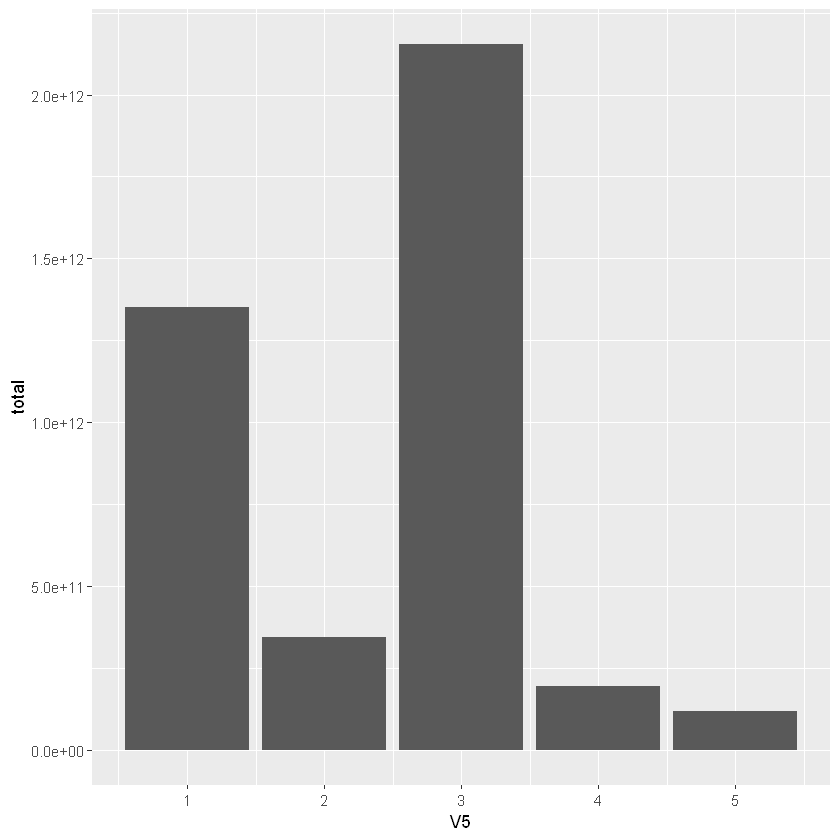

In [35]:
ggplot(data=welfare_pie,aes(x=V5,y=total))+geom_bar(stat="identity")

# 19년 1-6월,20년 1-6월에 시별로 여행에 사용한 금액

In [36]:
data_2020<-read.table('real/신한카드 데이터/KCTI_NATIVE_2020.txt',sep='|',row.names = NULL)
data_2019<-read.table('real/신한카드 데이터/KCTI_NATIVE_2019.txt',sep='|',row.names = NULL)

In [37]:
data_2020_travel  <-filter(data_2020,data_2020$V4=='여행')

In [38]:
data_2020_travel$V11<-as.numeric(data_2020_travel$V11)

In [39]:
head(data_2020_travel)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,대전,세종,.,여행,숙박,M,30,202001,RED,활동,510000,10
2,인천,세종,.,여행,체험,M,40,202001,RED,휴식,105060,5
3,부산,대구,남구,여행,체험,F,20,202001,RED,활동,267750,15
4,제주,부산,남구,여행,숙박,F,30,202001,RED,활동,168300,10
5,강원,울산,남구,여행,숙박,M,40,202001,RED,휴식,233580,5
6,인천,대구,남구,여행,체험,M,30,202001,RED,활동,145350,5


In [40]:
welfare_1<-filter(data_2020_travel,data_2020_travel$V8=='202001')

In [48]:
head(welfare_1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,대전,세종,.,여행,숙박,M,30,202001,RED,활동,510000,10
2,인천,세종,.,여행,체험,M,40,202001,RED,휴식,105060,5
3,부산,대구,남구,여행,체험,F,20,202001,RED,활동,267750,15
4,제주,부산,남구,여행,숙박,F,30,202001,RED,활동,168300,10
5,강원,울산,남구,여행,숙박,M,40,202001,RED,휴식,233580,5
6,인천,대구,남구,여행,체험,M,30,202001,RED,활동,145350,5


In [45]:
welfare_11<- welfare_1  %>% 
    group_by(V2)  %>% 
    summarise(total=sum(V11))

`summarise()` ungrouping output (override with `.groups` argument)



In [46]:
welfare_11

V2,total
<chr>,<dbl>
강원,56486208283
경기,77281857624
경남,15332818901
경북,14224349459
광주,4321600995
대구,9230882967
대전,244114724812
부산,67824941642
서울,551774248064


Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


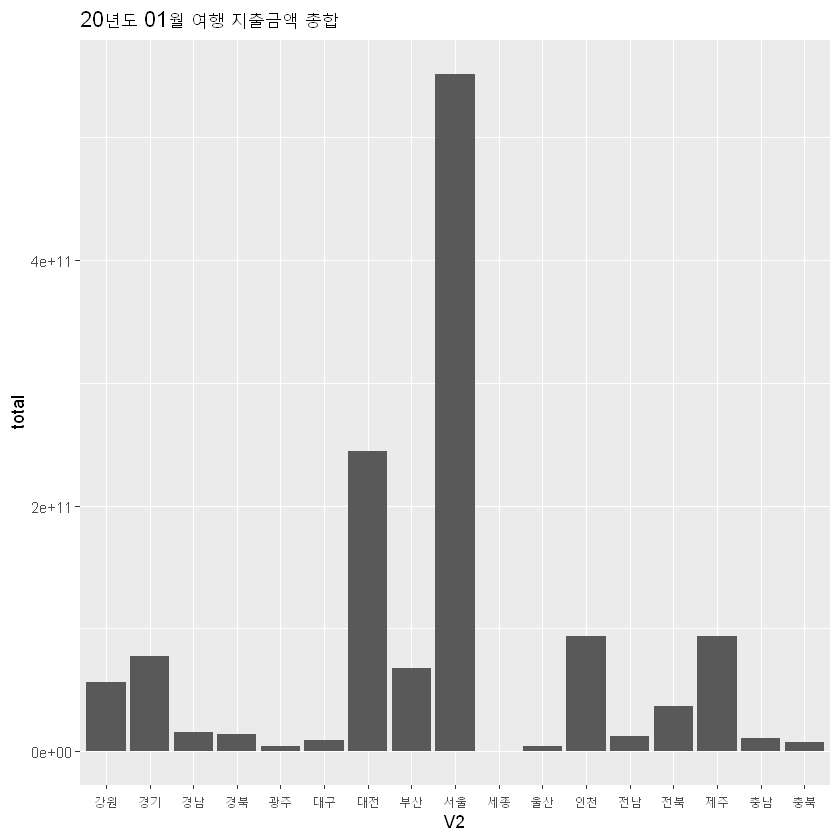

In [47]:
ggplot(data = welfare_11,aes(x=V2,y=total))+geom_histogram(stat="identity")+ggtitle('20년도 01월 여행 지출금액 총합')+options("scipen=100")